# **CS6501 - MACHINE LEARNING AND APPLICATIONS - TEAM BASED PROJECT**


# BER Data Preprocessing and Cleaning

The raw dataset contains **1,048,575 rows × 211 columns** and is publicly available from the **SEAI Ireland** website.  

The dataset contains a variety of building attributes, but also includes:  
- **Missing values** in many columns  
- **Redundant or low-quality columns** that do not contribute meaningfully to modeling  
- **Duplicate rows** that need to be removed  
- **Incorrect or inconsistent data types**  

# Data Preprocessing and Cleaning Notebook

This notebook focuses on preparing the raw BER dataset for further analysis and modeling.

## Objectives

1. **Data quality improvement:** Detect and remove duplicate or corrupted records to ensure consistency.  
2. **Handling missing and invalid values:** Impute missing data, remove negative or unrealistic BER values, and handle outliers effectively.  
3. **Feature refinement:** Eliminate low-quality or irrelevant columns and standardize data formats for numerical and categorical features.  
4. **Dataset reduction:** Produce a clean, high-quality subset of approximately **50,000 reliable records** suitable for exploratory analysis and model training.  


## ---------------------------------------------------------------------------------------
### Imports
## ---------------------------------------------------------------------------------------

In [62]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.max_colwidth', None)

## ---------------------------------------------------------------------------------------
### Phase 1: Dataset Loading and Initial Exploration

**Objective:**  
Understand the structure and quality of the raw BER dataset, including the number of rows and columns, data types, and preliminary statistics. This phase sets the foundation for subsequent data cleaning, preprocessing, and optimization steps.  
## ---------------------------------------------------------------------------------------

In [63]:
# Filepath of RAW dataset
file_path = r"..\dataset\BERPublicsearch.csv"
# Load the dataset
df = pd.read_csv(file_path)
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [64]:
# Row and column counts
num_rows, num_cols = df.shape
print(f"Raw dataset shape: {num_rows:,} rows × {num_cols:,} columns")

Raw dataset shape: 1,048,575 rows × 211 columns


In [65]:
# Count of Numerical and categorical columns
num_numeric = df.select_dtypes(include=['number']).shape[1]
num_categorical = df.select_dtypes(include=['object', 'category']).shape[1]
print(f"Numerical columns count: {num_numeric}")
print(f"Categorical column count: {num_categorical}")

Numerical columns count: 157
Categorical column count: 54


In [66]:
print(len(df.columns), 'COLUMNS')
print(" || ".join(df.columns))

211 COLUMNS
CountyName || DwellingTypeDescr || Year_of_Construction || TypeofRating || EnergyRating || BerRating || GroundFloorArea(sq m) || UValueWall || UValueRoof || UValueFloor || UValueWindow || UvalueDoor || WallArea || RoofArea || FloorArea || WindowArea || DoorArea || NoStoreys || CO2Rating || MainSpaceHeatingFuel || MainWaterHeatingFuel || HSMainSystemEfficiency || MultiDwellingMPRN || TGDLEdition || MPCDERValue || HSEffAdjFactor || HSSupplHeatFraction || HSSupplSystemEff || WHMainSystemEff || WHEffAdjFactor || SupplSHFuel || SupplWHFuel || SHRenewableResources || WHRenewableResources || NoOfChimneys || NoOfOpenFlues || NoOfFansAndVents || NoOfFluelessGasFires || DraftLobby || VentilationMethod || FanPowerManuDeclaredValue || HeatExchangerEff || StructureType || SuspendedWoodenFloor || PercentageDraughtStripped || NoOfSidesSheltered || PermeabilityTest || PermeabilityTestResult || TempAdjustment || HeatSystemControlCat || HeatSystemResponseCat || NoCentralHeatingPumps || CHBoi

## ---------------------------------------------------------------------------------------
### Phase 2: Drop Columns with High Missing Values

**Objective:**
Identify and remove columns that have a large proportion of missing data (more than 50%), as they provide little information and may negatively impact analysis and modeling. This helps reduce noise, improve dataset quality, and optimize memory usage.
## ---------------------------------------------------------------------------------------

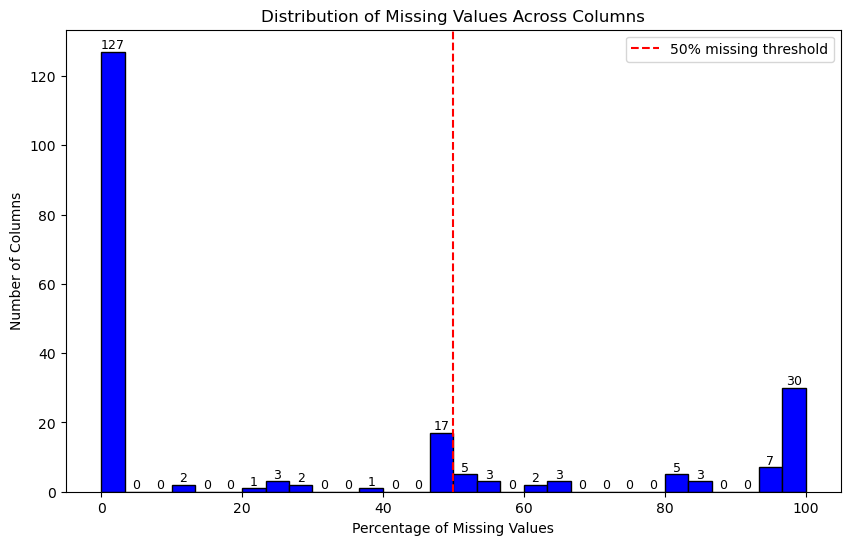

In [67]:
# Missing percent of each column
missing_percent = (df.isna().sum() / len(df)) * 100

# Histogram plot to depict number of columns in missing value bins
plt.figure(figsize=(10,6))
counts, bins, patches = plt.hist(missing_percent, bins=30, color='blue', edgecolor='black')
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2  
    y = counts[i]                           
    plt.text(x, y, int(y), ha='center', va='bottom', fontsize=9)
# Threshold line to mark 50%
plt.axvline(x=50, color='red', linestyle='--', label='50% missing threshold')
plt.title('Distribution of Missing Values Across Columns')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Number of Columns')
plt.legend()
plt.show()

In [68]:
# 50 Percent is marked here as threshold
threshold = 50 
cols_to_drop = missing_percent[missing_percent > threshold].sort_values(ascending=False).index.tolist()
# Display columns being dropped with their missing percentage
print(f"Columns to be dropped ({len(cols_to_drop)}):")
for col in cols_to_drop:
    print(f" COLUMN : {col} : {missing_percent[col]:.2f}% missing")

Columns to be dropped (58):
 COLUMN : ThirdEnerConsumedComment : 100.00% missing
 COLUMN : SecondEnerConsumedComment : 99.99% missing
 COLUMN : ThirdEnerProdComment : 99.95% missing
 COLUMN : FirstEnerConsumedComment : 99.82% missing
 COLUMN : gsdWHRenewableResources : 99.38% missing
 COLUMN : gsdSHRenewableResources : 99.38% missing
 COLUMN : SecondEnerProdComment : 99.38% missing
 COLUMN : VolumeOfPreHeatStore : 98.38% missing
 COLUMN : ThirdBoilerFuelType : 98.33% missing
 COLUMN : ThirdHeatGenPlantEff : 98.33% missing
 COLUMN : ThirdPercentageHeat : 98.33% missing
 COLUMN : SecondBoilerFuelType : 98.33% missing
 COLUMN : SecondHeatGenPlantEff : 98.33% missing
 COLUMN : SolarHeatFraction : 98.33% missing
 COLUMN : SecondPercentageHeat : 98.33% missing
 COLUMN : SolarSpaceHeatingSystem : 98.33% missing
 COLUMN : CHPUnitHeatFraction : 98.33% missing
 COLUMN : FirstBoilerFuelType : 98.33% missing
 COLUMN : SupplHSFuelTypeID : 98.33% missing
 COLUMN : CHPFuelType : 98.33% missing
 COLUM

In [69]:
# Drop the above listed columns with greater thatn 50% missing values
df = df.drop(columns=cols_to_drop)
print(f"Dropped {len(cols_to_drop)} columns with more than {threshold}% missing values.")

Dropped 58 columns with more than 50% missing values.


In [70]:
print(f"AFTER DROPPING >50% EMPTY COLUMNS --- Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns")

AFTER DROPPING >50% EMPTY COLUMNS --- Dataset shape: 1048575 rows × 153 columns


## ---------------------------------------------------------------------------------------
### Phase 3: Remove Duplicate Rows

**Objective:**
Identify and remove any duplicate records in the dataset to ensure each row represents a unique building assessment. This helps prevent bias and ensures the quality of the data before further preprocessing, feature selection, and modeling.
## ---------------------------------------------------------------------------------------

In [71]:
# Identify duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows : {duplicates}")

Number of duplicate rows : 23256


In [72]:
# Drop duplicated
df = df.drop_duplicates()
print(f"Duplicates removed")

Duplicates removed


In [73]:
print(f"AFTER DROPPING DUPLICATE ROWS --- Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns")

AFTER DROPPING DUPLICATE ROWS --- Dataset shape: 1025319 rows × 153 columns


## ---------------------------------------------------------------------------------------
### Phase 4: Remove Rows with Invalid BER Ratings

**Objective:**
The BER (Building Energy Rating) is always a positive numeric value, so any row where BerRating < 0 is invalid. Removing these rows ensures the integrity of the target variable before modeling.
## ---------------------------------------------------------------------------------------

In [74]:
# Identify negative BerRating rows
num_negative = (df['BerRating'] < 0).sum()
print(f"Number of rows with negative BER_Rating: {num_negative}")

Number of rows with negative BER_Rating: 3032


In [75]:
# Drop negative BER value rows
df = df[df['BerRating'] >= 0]
print(f"Negative BER rating rows removed")

Negative BER rating rows removed


In [76]:
print(f"AFTER DROPPING NEGATIVE BER RATING ROWS --- Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns")

AFTER DROPPING NEGATIVE BER RATING ROWS --- Dataset shape: 1022287 rows × 153 columns


## ---------------------------------------------------------------------------------------
### Phase 5: Stratified Sampling

**Objective:**
The raw dataset is very large (~1 million rows). To make preprocessing, visualization, and model experimentation faster while maintaining the representative distribution of BER ratings, we perform stratified sampling. This ensures that all ranges of BER values are proportionally represented in the sampled subset of 50k rows.
## ---------------------------------------------------------------------------------------

In [77]:
# Define number of bins
num_bins = 10
df['BER_bin'] = pd.qcut(df['BerRating'], q=num_bins, duplicates='drop')

In [78]:
# Records per bin in Raw dataset
bin_counts_raw = df['BER_bin'].value_counts().sort_index()
print("Number of records per BER bin (full dataset):")
print(bin_counts_raw)

Number of records per BER bin (full dataset):
BER_bin
(-0.001, 44.32]       102265
(44.32, 78.37]        102195
(78.37, 135.04]       102264
(135.04, 162.04]      102213
(162.04, 185.58]      102217
(185.58, 210.22]      102227
(210.22, 240.18]      102233
(240.18, 284.92]      102235
(284.92, 368.77]      102210
(368.77, 56423.71]    102228
Name: count, dtype: int64


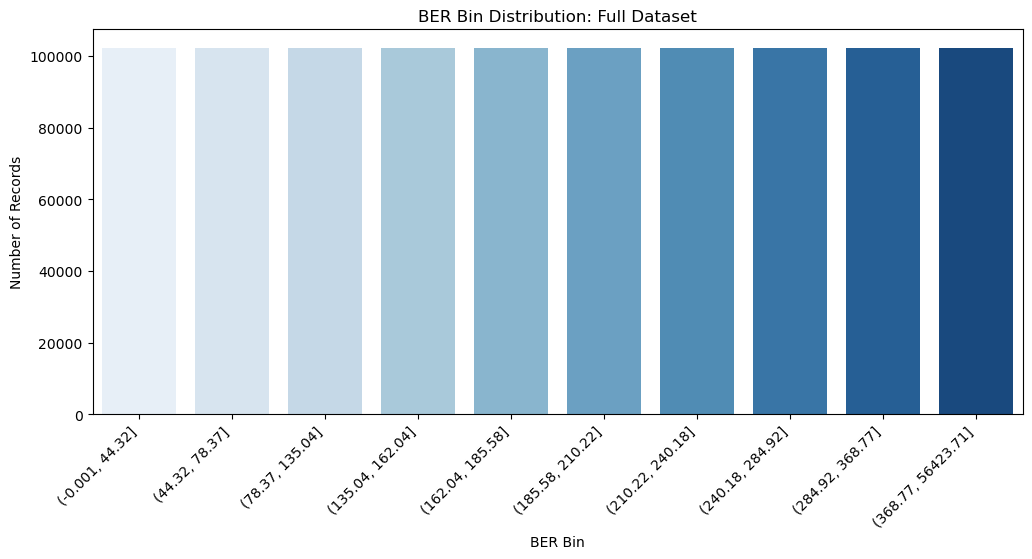

In [79]:
# Plot
plt.figure(figsize=(12,5))
sns.countplot(x='BER_bin', data=df, palette='Blues')
plt.title('BER Bin Distribution: Full Dataset')
plt.xlabel('BER Bin')
plt.ylabel('Number of Records')
plt.xticks(rotation=45, ha='right') 
plt.show()

In [80]:
# Stratified sample 50k rows
df_sample, _ = train_test_split(df, train_size=50000, stratify=df['BER_bin'], random_state=0)

In [81]:
# Records per bin in chosen 50K dataset
bin_counts_sample = df_sample['BER_bin'].value_counts().sort_index()
print("Number of records per BER bin in 50k selction:")
print(bin_counts_sample)

Number of records per BER bin in 50k selction:
BER_bin
(-0.001, 44.32]       5002
(44.32, 78.37]        4998
(78.37, 135.04]       5002
(135.04, 162.04]      4999
(162.04, 185.58]      5000
(185.58, 210.22]      5000
(210.22, 240.18]      5000
(240.18, 284.92]      5000
(284.92, 368.77]      4999
(368.77, 56423.71]    5000
Name: count, dtype: int64


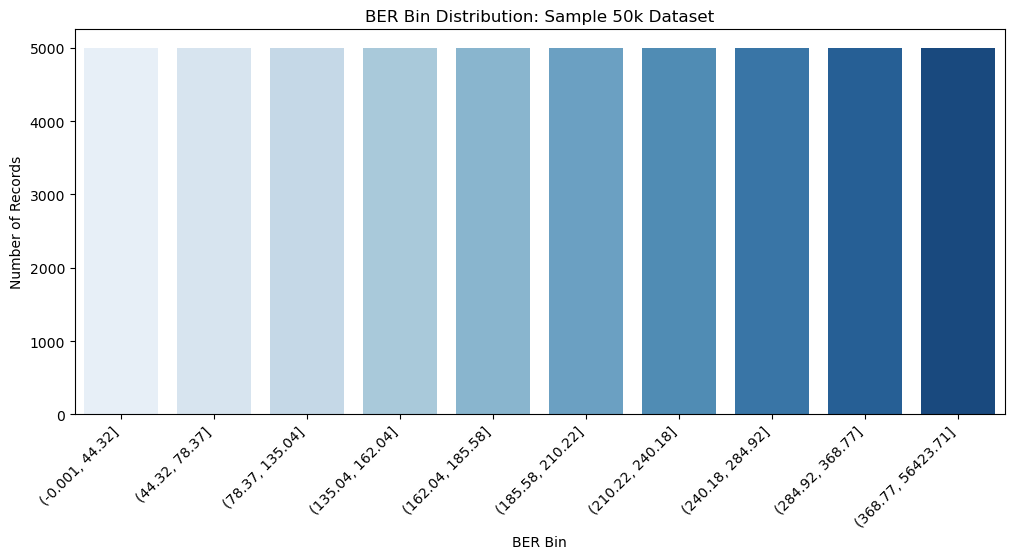

In [82]:
# Plot
plt.figure(figsize=(12,5))
sns.countplot(x='BER_bin', data=df_sample, palette='Blues')
plt.title('BER Bin Distribution: Sample 50k Dataset')
plt.xlabel('BER Bin')
plt.ylabel('Number of Records')
plt.xticks(rotation=45, ha='right') 
plt.show()

## ---------------------------------------------------------------------------------------
### Phase 6: Imputation of Remaining Missing Values

**Objective:**  
After cleaning and sampling the dataset, some columns may still have a small number of missing entries in the selcted 50k data.  
This phase focuses on **filling those remaining missing values** using appropriate strategies:  

- **Numerical columns:** replace missing values with median (robust to outliers).  
- **Categorical columns:** replace missing values with placeholder like 'Missing'.
## ---------------------------------------------------------------------------------------

In [83]:
# Identify numeric vs categorical columns
num_cols = df_sample.select_dtypes(include=['number']).columns
cat_cols = df_sample.select_dtypes(include=['object', 'category']).columns

In [84]:
# Impute missing values in numerical columns with median
filled_summary = []
for col in num_cols:
    missing_count = df_sample[col].isna().sum()
    if missing_count > 0:
        median_value = df_sample[col].median()
        df_sample[col].fillna(median_value, inplace=True)
        filled_summary.append({'Column': col, 'MissingFilled': missing_count, 'FilledWith': median_value})

# Convert to DataFrame for neat display
filled_summary_df = pd.DataFrame(filled_summary)
display(filled_summary_df)

,Column,MissingFilled,FilledWith
0,HSMainSystemEfficiency,816,90.200000
1,HSEffAdjFactor,816,1.000000
2,HSSupplHeatFraction,816,0.100000
3,HSSupplSystemEff,816,30.000000
4,WHMainSystemEff,816,90.300000
5,WHEffAdjFactor,816,1.000000
6,SupplSHFuel,816,8.000000
7,SupplWHFuel,816,1.000000
8,SHRenewableResources,816,2.000000
9,WHRenewableResources,816,2.000000


In [85]:
total_filled = sum(filled_summary_df['MissingFilled'])
print(f"Total missing values imputed in numeric columns: {total_filled}")

Total missing values imputed in numeric columns: 316043


In [86]:
# Convert all categorical columns to string type and replace missing values with 'Missing'
for col in cat_cols:
    df_sample[col] = df_sample[col].astype(str).replace('nan', 'Missing')

In [87]:
# Count total categorical entries replaced with 'Missing'
total_cat_filled = sum(df_sample[col].eq('Missing').sum() for col in cat_cols)
print(f"Total categorical entries filled: {total_cat_filled}")

Total categorical entries filled: 239973


In [88]:
total_missing = df_sample.isna().sum().sum()
print(f"\nTotal missing values remaining in df_sample: {total_missing}")


Total missing values remaining in df_sample: 0


## ---------------------------------------------------------------------------------------
### Phase 7: Outlier Capping

**Objective:**
Handle extreme values in numerical features to prevent them from skewing analysis and models. Instead of deleting outliers, we cap them at the 1st and 99th percentiles so the distribution remains reasonable while extreme values are controlled.
## ---------------------------------------------------------------------------------------

In [89]:
# identify numerical columns
num_cols = df_sample.select_dtypes(include=['number']).columns.tolist()

In [90]:
# Selected 4 columns to plot boox plots before and after capping
plot_cols = ['PrimaryEnergySecondarySpace','DeliveredEnergySecondarySpace','CO2SecondarySpace','PrimaryEnergyMainSpace','BerRating']

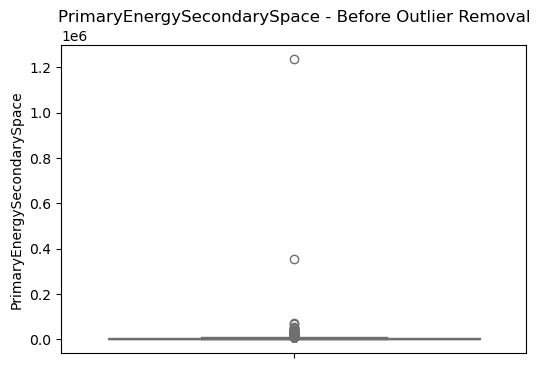

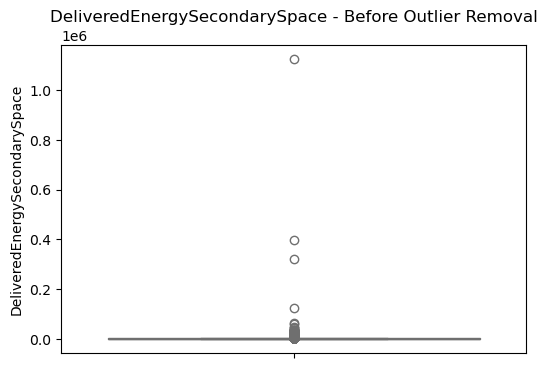

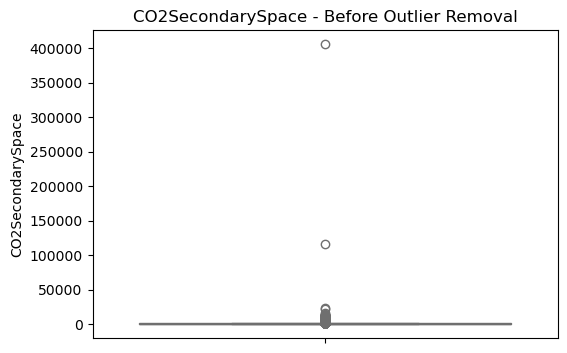

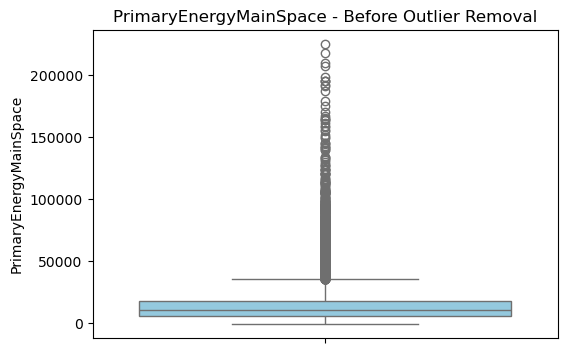

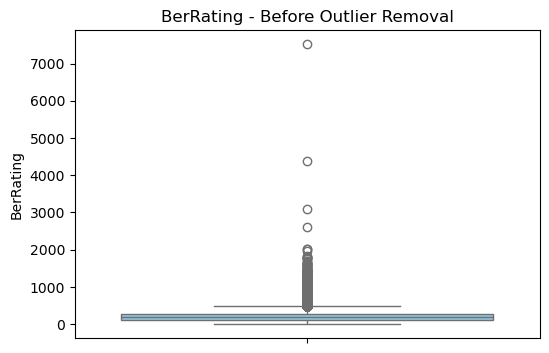

In [91]:
# plot before capping
for col in plot_cols:
    plt.figure(figsize=(6,4))
    box = sns.boxplot(y=df_sample[col], color='skyblue')
    plt.title(f'{col} - Before Outlier Removal')
    plt.show()

In [92]:
# Cap extreme outliers by clipping numerical values to the 1st and 99th percentiles.
for col in num_cols:
    lower = df_sample[col].quantile(0.01)
    upper = df_sample[col].quantile(0.99)
    df_sample[col] = np.clip(df_sample[col], lower, upper)

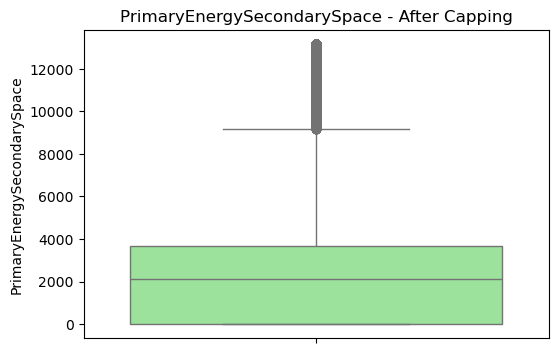

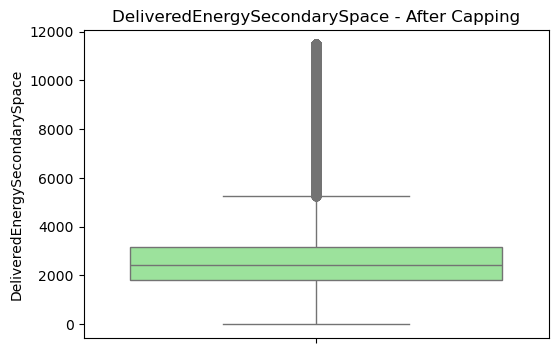

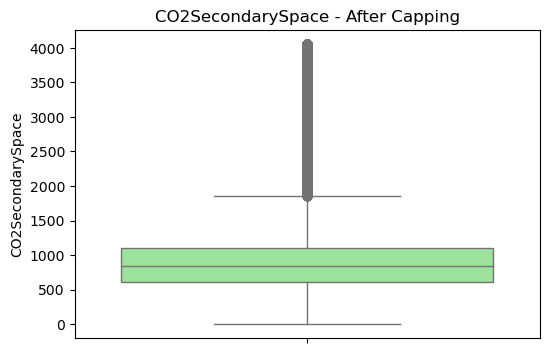

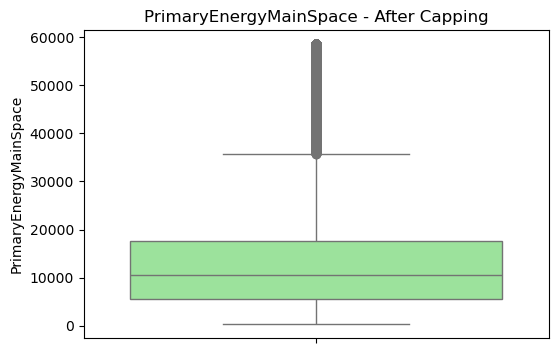

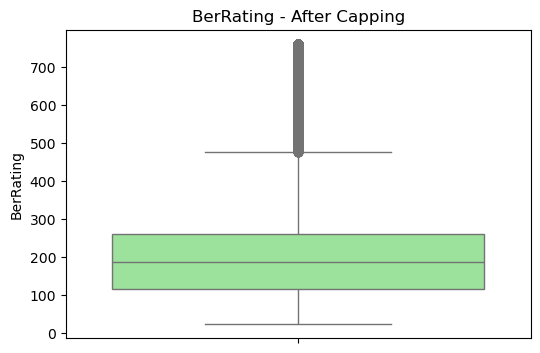

In [93]:
# Plot after capping
for col in plot_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df_sample[col], color='lightgreen', showfliers=True)
    plt.title(f'{col} - After Capping')
    plt.show()

## ---------------------------------------------------------------------------------------
### Phase 8: Removal of Low Variance Columns

**Objective:**
Columns where almost all values are identical provide little to no information for predictive modeling and can increase computational overhead. Removing these low-variance features helps simplify the dataset without losing predictive power.
## ---------------------------------------------------------------------------------------

In [94]:
# Identify low variance columns
low_variance_cols = []
print("Low variance columns (value mostly constant):")
for col in df_sample.columns:
    top_freq = df_sample[col].value_counts(normalize=True, dropna=False).values[0]
    if top_freq > 0.98:  # Threshold - 98% of values are the same
        low_variance_cols.append(col)
        unique_count = df_sample[col].nunique(dropna=False)
        print(f"{col:<35} | Unique values: {unique_count:<5} | Top frequency: {top_freq:.2%}")

print(f"Total low variance columns: {len(low_variance_cols)}")

Low variance columns (value mostly constant):
MultiDwellingMPRN                   | Unique values: 2     | Top frequency: 99.34%
NoOfFluelessGasFires                | Unique values: 1     | Top frequency: 100.00%
WarmAirHeatingSystem                | Unique values: 2     | Top frequency: 99.70%
CombiBoilerAddLoss                  | Unique values: 304   | Top frequency: 98.20%
ElecConsumpKeepHot                  | Unique values: 1     | Top frequency: 100.00%
SWHPumpSolarPowered                 | Unique values: 2     | Top frequency: 99.86%
ChargingBasisHeatConsumed           | Unique values: 2     | Top frequency: 98.78%
ThirdFloorArea                      | Unique values: 1     | Top frequency: 100.00%
ThirdFloorHeight                    | Unique values: 1     | Top frequency: 100.00%
FirstEnerConsumedDelivered          | Unique values: 1     | Top frequency: 100.00%
FirstEnerConsumedConvFactor         | Unique values: 1     | Top frequency: 100.00%
FirstEnerConsumedCO2EmissionFactor 

In [95]:
# Drop low variance columns
df_sample.drop(columns=low_variance_cols, inplace=True)
print("Dropped low variance columns")

Dropped low variance columns


In [96]:
print(f"AFTER DROPPING LOW VARIANCE COLUMNS --- Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns")

AFTER DROPPING LOW VARIANCE COLUMNS --- Dataset shape: 1022287 rows × 154 columns


## ---------------------------------------------------------------------------------------
### Phase 9: Data Type Optimization

**Objective:**
Optimize the memory usage of the dataset by converting columns to more efficient data types without losing information. This is especially important for large datasets, as it improves performance and reduces computational load for subsequent feature selection and modeling steps.
## ---------------------------------------------------------------------------------------

In [97]:
# Memory requirement before optimization
mem_before = df_sample.memory_usage(deep=True).sum() / 1024**2
print(f"Memory usage before optimization: {mem_before:.2f} MB\n")

Memory usage before optimization: 137.97 MB



In [98]:
conversions = []
# Numeric columns
num_cols = df_sample.select_dtypes(include=['number']).columns.tolist()
for col in num_cols:
    old_dtype = df_sample[col].dtype
    if pd.api.types.is_float_dtype(df_sample[col]) and (df_sample[col] % 1 == 0).all():
        df_sample[col] = df_sample[col].astype('int32')
        conversions.append((col, old_dtype, 'int32'))
    elif pd.api.types.is_float_dtype(df_sample[col]):
        df_sample[col] = df_sample[col].astype('float32')
        conversions.append((col, old_dtype, 'float32'))
    elif pd.api.types.is_integer_dtype(df_sample[col]):
        df_sample[col] = df_sample[col].astype('int32')
        conversions.append((col, old_dtype, 'int32'))

In [99]:
cat_cols = df_sample.select_dtypes(include=['object', 'category']).columns.tolist()
for col in cat_cols:
    old_dtype = df_sample[col].dtype
    df_sample[col] = df_sample[col].astype('category')
    conversions.append((col, old_dtype, 'category'))

In [100]:
print("Columns converted (old_dtype → new_dtype):")
for col, old, new in conversions:
    print(f" - {col}: {old} → {new}")

Columns converted (old_dtype → new_dtype):
 - Year_of_Construction: int64 → int32
 - BerRating: float64 → float32
 - GroundFloorArea(sq m): float64 → float32
 - UValueWall: float64 → float32
 - UValueRoof: float64 → float32
 - UValueFloor: float64 → float32
 - UValueWindow: float64 → float32
 - UvalueDoor: float64 → float32
 - WallArea: float64 → float32
 - RoofArea: float64 → float32
 - FloorArea: float64 → float32
 - WindowArea: float64 → float32
 - DoorArea: float64 → float32
 - NoStoreys: int64 → int32
 - CO2Rating: float64 → float32
 - HSMainSystemEfficiency: float64 → float32
 - TGDLEdition: int64 → int32
 - MPCDERValue: float64 → float32
 - HSEffAdjFactor: float64 → float32
 - HSSupplHeatFraction: float64 → float32
 - HSSupplSystemEff: float64 → float32
 - WHMainSystemEff: float64 → float32
 - WHEffAdjFactor: float64 → float32
 - SupplSHFuel: float64 → int32
 - SupplWHFuel: float64 → int32
 - SHRenewableResources: float64 → int32
 - WHRenewableResources: float64 → int32
 - NoOfC

In [101]:
#  Memory requirement after optimization
mem_after = df_sample.memory_usage(deep=True).sum() / 1024**2
print(f"\nMemory usage after optimization: {mem_after:.2f} MB")
print(f"Total memory saved: {mem_before - mem_after:.2f} MB")


Memory usage after optimization: 22.54 MB
Total memory saved: 115.44 MB


## ---------------------------------------------------------------------------------------
### Phase 10: Shuffle Dataset

**Objective:**
Randomly shuffle the dataset to ensure that the order of rows does not introduce any bias in subsequent steps like feature selection or modeling.
## ---------------------------------------------------------------------------------------

In [102]:
df_sample = df_sample.sample(frac=1, random_state=42).reset_index(drop=True)
print("Dataset shuffled successfully. Total records:", len(df_sample))

Dataset shuffled successfully. Total records: 50000


## ---------------------------------------------------------------------------------------
### Saving the cleaned dataset
## ---------------------------------------------------------------------------------------

In [103]:
file_path = r"..\dataset\BERPublicsearch_Cleaned.csv"
df_sample.to_csv(file_path, index=False)
print(f"Cleaned dataset saved successfully")


Cleaned dataset saved successfully


In [104]:
print(f"After cleaning - Dataset shape: {df_sample.shape[0]} rows × {df_sample.shape[1]} columns")

After cleaning - Dataset shape: 50000 rows × 124 columns


### Raw Dataset: 1,048,575 rows × 211 columns with missing values, duplicates, low-variance and inconsistent types.
### Cleaned Dataset: 50,000 rows × 124 columns after missing value handling, outlier capping, low-variance removal, type optimization, and shuffling, ready for feature selection and modeling.